### 1. setting and data

In [1]:
# install module
!pip install --upgrade pip
!pip install pyyaml pandas numpy matplotlib seaborn scikit-learn opencv-python
!pip iuninstall keras -y
!pip install tensorflow>=2.16


ERROR: unknown command "iuninstall" - maybe you meant "uninstall"
zsh:1: 2.16 not found


In [2]:
# directory setting
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
# import module
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from config.load_config import load_config
from data.split_dataset import data_count, extract_balanced_dataset
from data.data_distribution import class_distribution
from data.dataloader import get_generators
from models.build_model import get_model
from models.build_model import build_model
from train.optimizer import get_optimizer
from train.callbacks import get_callbacks
from train.trainer import train_model
from utils.evaluation import (
    evaluate_model,
    plot_confusion_matrix, 
    plot_train_history, 
    show_top_misclassified, 
    plot_metrics_text,
    plot_cross_val_metrics
)
from utils.save_results import save_results
from train.cross_validation import run_cross_validation

/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Load configuration
config = load_config('/Users/vnlt/PROJECT/ex-cnn-cv/config/config_C.yaml')
data_dir = f"{config['base_output_dir']}/seed{config['seed']}"
batch_size = config['batch_size']
save_dir = f"results/{config['experiment_id']}"
os.makedirs(save_dir, exist_ok=True)

In [5]:
# check if config is loaded correctly
print(type(config))
print(config)

<class 'dict'>
{'experiment_id': 'verC_(epochs)_(model_name)', 'backbone_name': 'ResNet50', 'original_dataset_dir': '/Users/vnlt/PROJECT/ex-cnn-cv/data/dataset/seed99', 'base_output_dir': '/Users/vnlt/PROJECT/ex-cnn-cv/data/dataset', 'model_save_dir': '/Users/vnlt/PROJECT/ex-cnn-cv/models/save_models', 'num_classes': 5, 'input_shape': [224, 224, 3], 'train_ratio': 0.7, 'val_ratio': 0.2, 'test_ratio': 0.1, 'seed': 41, 'use_cross_validation': True, 'cross_validation_type': 'stratified_kfold', 'n_splits': 5, 'n_repeats': 1, 'epochs': 1, 'batch_size': 5, 'optimizer': 'adamw', 'learning_rate': 0.0001, 'weight_decay': '1e-5', 'patience': 10, 'dropout_rate': 0.5, 'save_best_only': True}


#### select experimet type

✅ 교차 검증 모드를 실행합니다.
✅ 교차 검증을 시작합니다.
ℹ️ '/Users/vnlt/PROJECT/ex-cnn-cv/data/dataset/cv_seed41'에 이미 분할된 데이터가 존재하여 분할을 건너뜁니다.
교차 검증을 위해 Train_val 데이터를 로드합니다.

--- Fold 1/5 시작 ---
Found 72 validated image filenames belonging to 5 classes.
Found 18 validated image filenames belonging to 5 classes.


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 851ms/step - accuracy: 0.2682 - loss: 1.7772 - val_accuracy: 0.5000 - val_loss: 1.1785 - learning_rate: 1.0000e-04
[Time] total=23.9s, per-epoch avg=23.87s
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step
--- Fold 1 결과 시각화 및 저장 ---


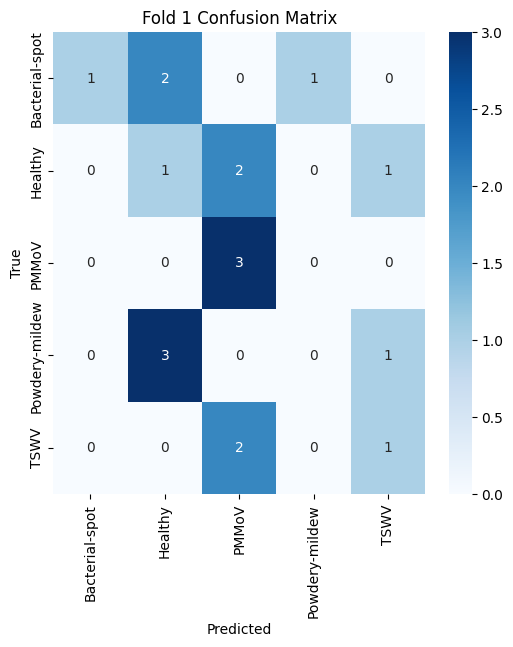

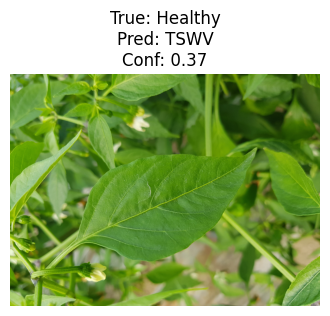

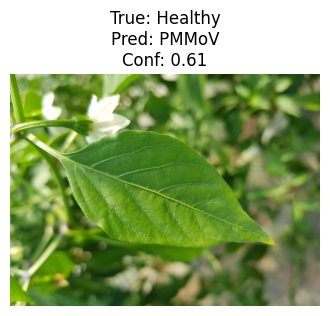

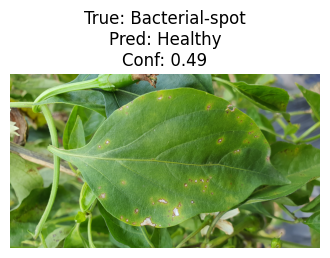

✅ 결과 저장 완료: results/verC_(epochs)_(model_name)/folds/fold_1

--- Fold 2/5 시작 ---
Found 72 validated image filenames belonging to 5 classes.
Found 18 validated image filenames belonging to 5 classes.


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 860ms/step - accuracy: 0.2645 - loss: 2.0611 - val_accuracy: 0.3889 - val_loss: 1.2084 - learning_rate: 1.0000e-04
[Time] total=24.4s, per-epoch avg=24.33s


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step
--- Fold 2 결과 시각화 및 저장 ---


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

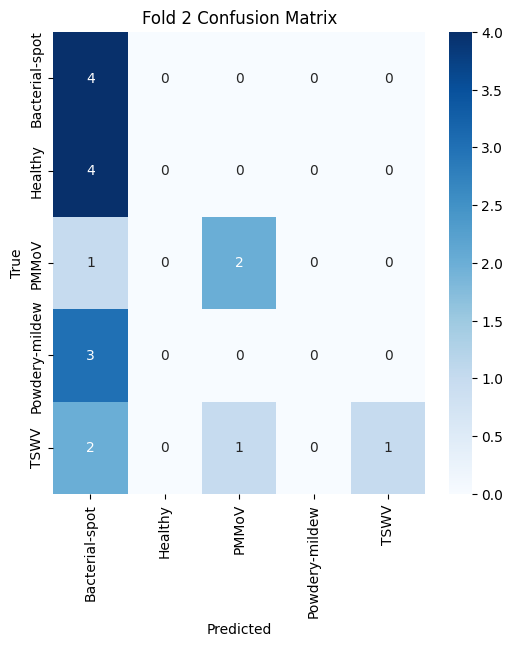

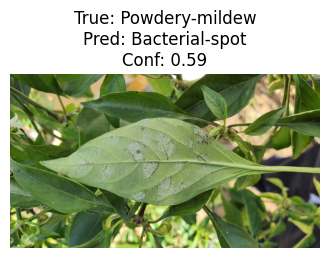

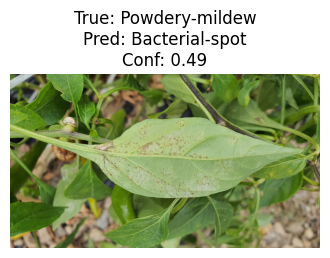

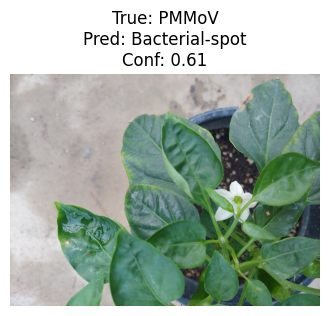

✅ 결과 저장 완료: results/verC_(epochs)_(model_name)/folds/fold_2

--- Fold 3/5 시작 ---
Found 72 validated image filenames belonging to 5 classes.
Found 18 validated image filenames belonging to 5 classes.


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 840ms/step - accuracy: 0.1856 - loss: 1.9607 - val_accuracy: 0.5556 - val_loss: 1.2462 - learning_rate: 1.0000e-04
[Time] total=24.7s, per-epoch avg=24.65s
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3550f2430> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step
--- Fold 3 결과 시각

/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

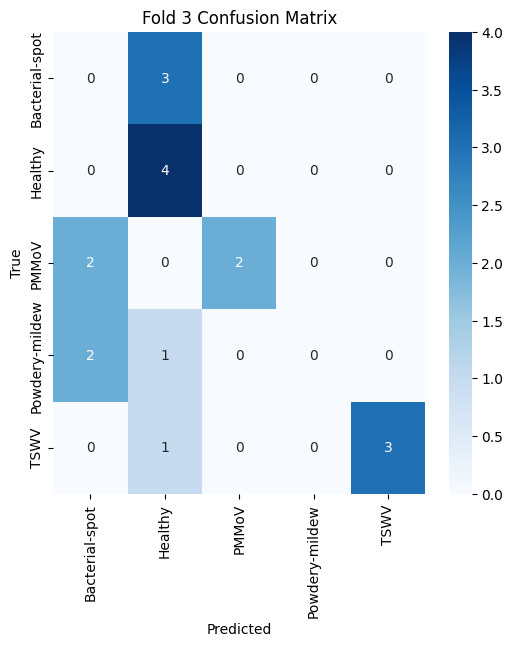

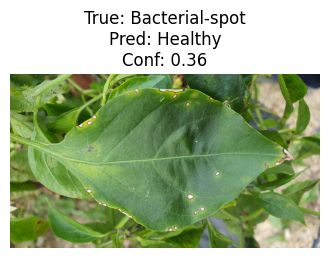

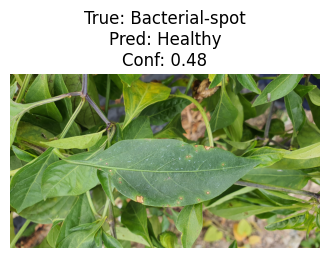

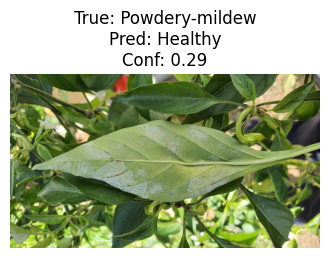

✅ 결과 저장 완료: results/verC_(epochs)_(model_name)/folds/fold_3

--- Fold 4/5 시작 ---
Found 72 validated image filenames belonging to 5 classes.
Found 18 validated image filenames belonging to 5 classes.


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 881ms/step - accuracy: 0.3571 - loss: 1.7079 - val_accuracy: 0.4444 - val_loss: 1.5176 - learning_rate: 1.0000e-04
[Time] total=24.6s, per-epoch avg=24.58s


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 370ms/step
--- Fold 4 결과 시각화 및 저장 ---


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

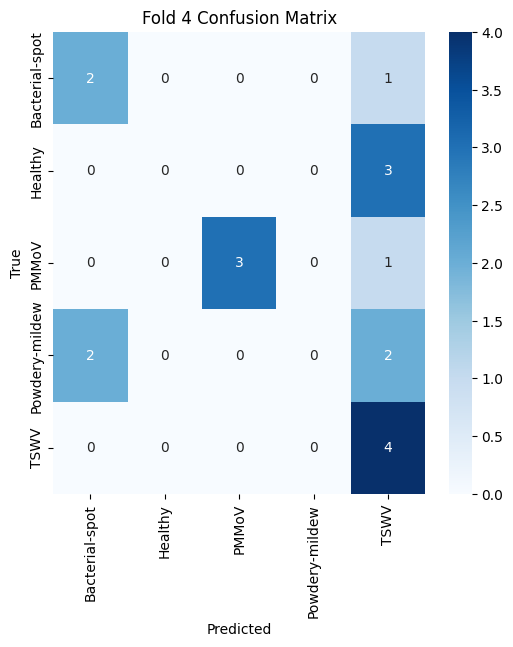

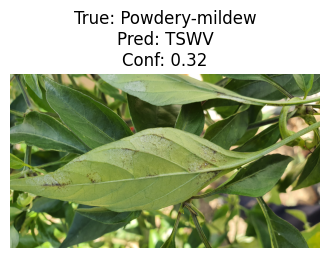

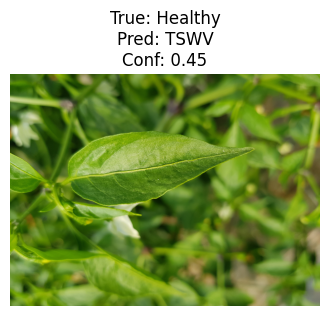

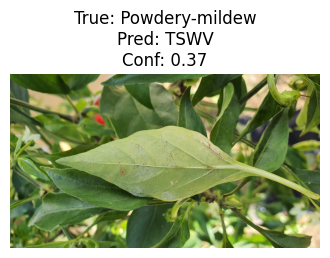

✅ 결과 저장 완료: results/verC_(epochs)_(model_name)/folds/fold_4

--- Fold 5/5 시작 ---
Found 72 validated image filenames belonging to 5 classes.
Found 18 validated image filenames belonging to 5 classes.


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 834ms/step - accuracy: 0.2989 - loss: 1.6079 - val_accuracy: 0.6111 - val_loss: 1.0598 - learning_rate: 1.0000e-04
[Time] total=24.2s, per-epoch avg=24.17s


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step
--- Fold 5 결과 시각화 및 저장 ---


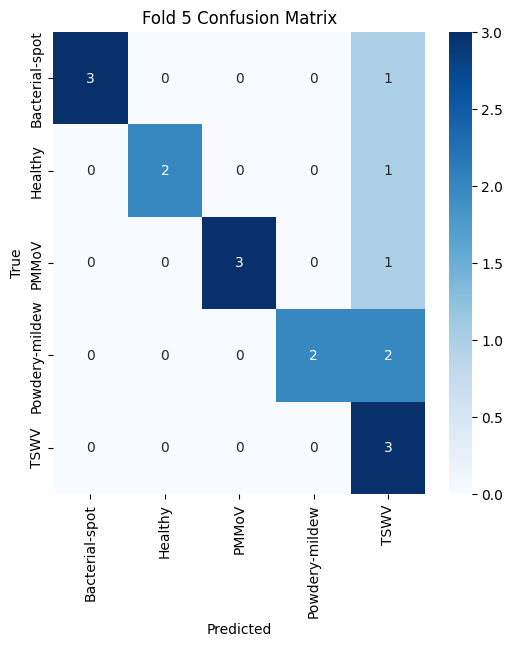

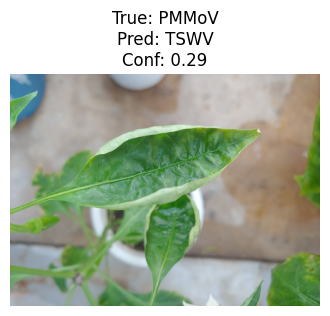

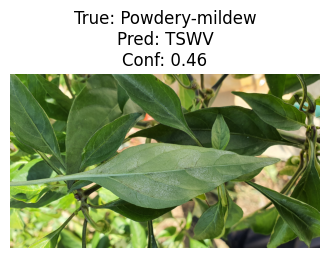

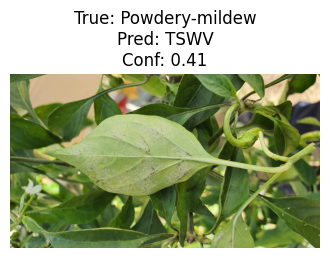

✅ 결과 저장 완료: results/verC_(epochs)_(model_name)/folds/fold_5

--- 교차 검증 최종 결과 ---
평균 정확도: 0.4889 ± 0.1491
평균 Macro F1-score: 0.4349 ± 0.1818
총 학습 시간: 2.08 분 (124.77 초)
verC_(epochs)_(model_name)_CV_Dataset_Distribution


,Fold 1 (Train),Fold 1 (Val),Fold 2 (Train),Fold 2 (Val),Fold 3 (Train),Fold 3 (Val),Fold 4 (Train),Fold 4 (Val),Fold 5 (Train),Fold 5 (Val),Test
Class,,,,,,,,,,,
Bacterial-spot,14,4,14,4,15,3,15,3,14,4,2
Healthy,14,4,14,4,14,4,15,3,15,3,2
PMMoV,15,3,15,3,14,4,14,4,14,4,2
Powdery-mildew,14,4,15,3,15,3,14,4,14,4,2
TSWV,15,3,14,4,14,4,14,4,15,3,2



✅ CV 데이터 분포 표를 'results/verC_(epochs)_(model_name)/cv_data_distribution.png'에 저장했습니다.


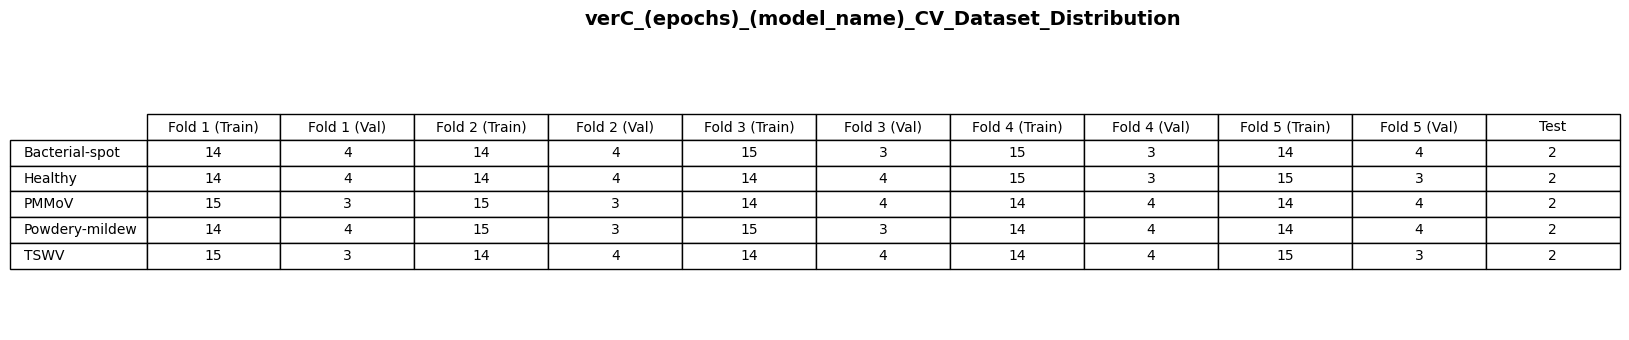

✅ 통합 History 그래프를 'results/verC_(epochs)_(model_name)/combined_history_graph.png'에 저장했습니다.


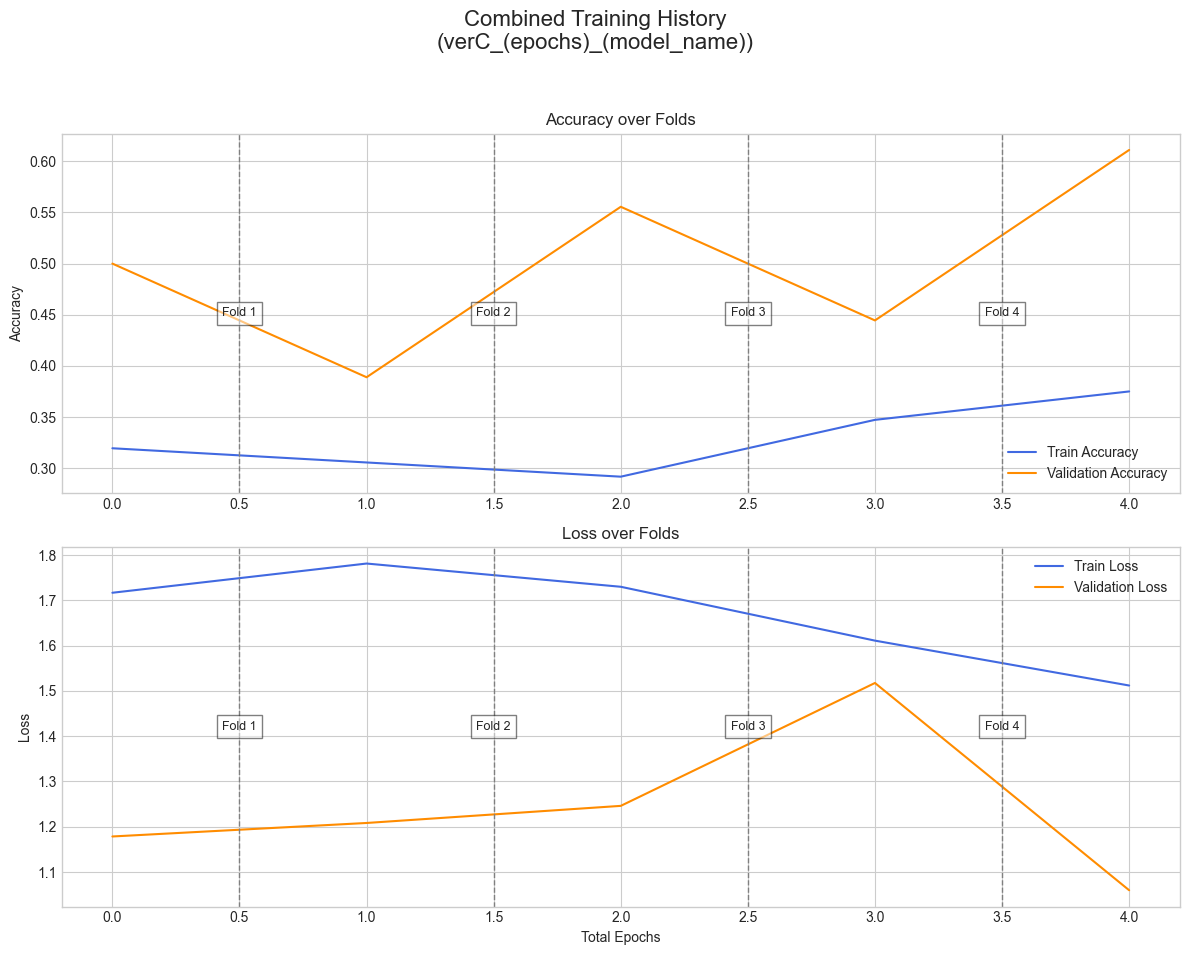

✅ 교차 검증 완료. 최종 결과는 'results/verC_(epochs)_(model_name)'에 저장되었습니다.
✅ 최종 결과 요약 이미지를 'results/verC_(epochs)_(model_name)/cross_val_summary.png'에 저장했습니다.
✅ 교차 검증 지표 그래프를 'results/verC_(epochs)_(model_name)/cross_val_metrics_boxplot.png'에 저장했습니다.


/Users/vnlt/PROJECT/ex-cnn-cv/utils/evaluation.py:116: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot(i, means[i], 'rD', markersize=8, label='Mean' if i == 0 else "")


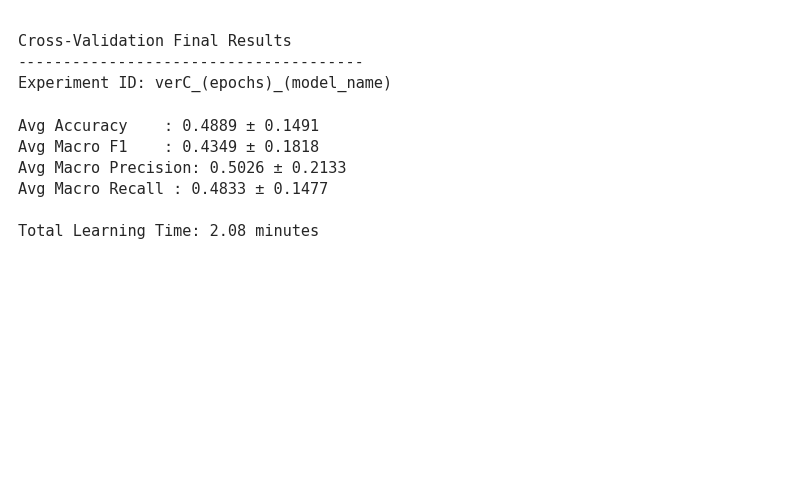

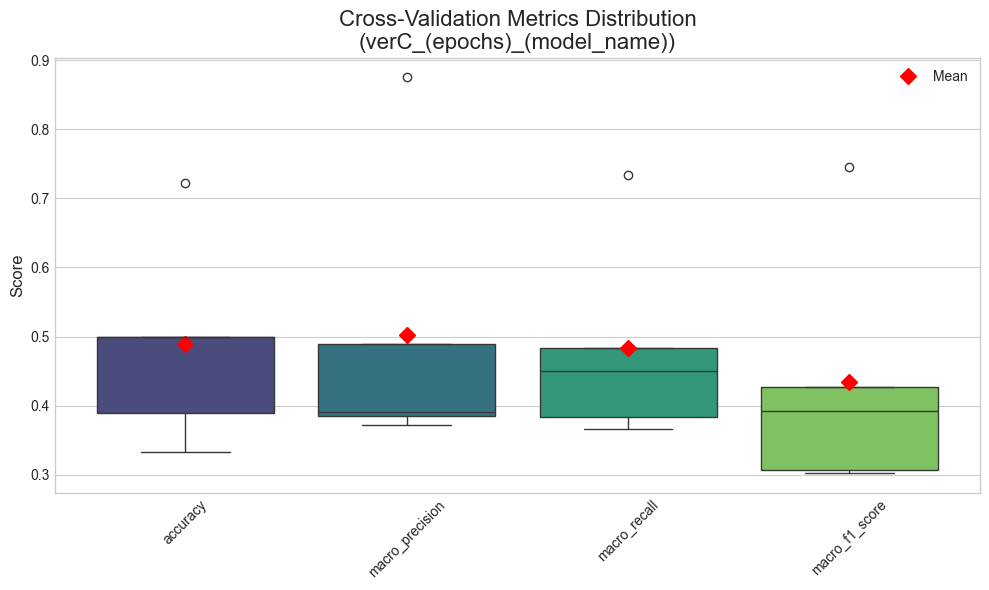

In [6]:
if config.get('use_cross_validation', False):
    print("✅ 교차 검증 모드를 실행합니다.")
    results = run_cross_validation(config) 
    # 최종 결과 시각화
    results_df = pd.DataFrame(results['individual_folds'])
    save_dir = f"results/{config['experiment_id']}" # 저장 경로 확인
    plot_cross_val_metrics(
        results_df, 
        config['experiment_id'], 
        save_path=f"{save_dir}/cross_val_metrics_boxplot.png"
    )
    
else:
    print("✅ 단일 훈련 모드를 실행합니다.")
    
    # 데이터 불러오기
    class_image_counts, images, min_count = data_count(
        original_dataset_dir=config['original_dataset_dir']
    )
    extract_balanced_dataset(
        original_dataset_dir=config['original_dataset_dir'],
        min_count=min_count,
        base_output_dir=f"{config['base_output_dir']}/seed{config['seed']}",
        seed=config['seed']
    )

    train_gen, val_gen, test_gen = get_generators(
        model_name=config['backbone_name'],
        input_shape=tuple(config['input_shape']),
        batch_size=config['batch_size'],
        data_dir=f"{config['base_output_dir']}/seed{config['seed']}",
        train_ratio=config['train_ratio'],
        val_ratio=config['val_ratio'],
        test_ratio=config['test_ratio'],
        seed=config['seed'],
        augmentations=config['augmentations']
    )
    
    class_distribution(
        train_gen,
        val_gen,
        test_gen,
        config,
        save_path=f"{save_dir}/dist_table.png"
    )
    print("data generators completed.")
    
    # 모델 빌드 및 학습
    model = build_model(
        backbone_name=config['backbone_name'],
        input_shape=tuple(config['input_shape']),
        num_classes=config['num_classes'],
        dropout_rate=config['dropout_rate']
    )
    optimizer = get_optimizer(
        optimizer_name=config['optimizer'],
        learning_rate=config['learning_rate'],
        weight_decay=config.get('weight_decay', 0.0)
    )
    callbacks = get_callbacks(
        model_name=config['backbone_name'],
        save_dir=f"results/{config['experiment_id']}",
        patience=config['patience']
    )
    print("model ready.")
    
    history = train_model(
        model,
        train_gen,
        val_gen,
        epochs=config['epochs'],
        callbacks=callbacks,
        optimizer=optimizer
    )
    print("training completed.")
    
    # 모델 평가
    y_true, y_pred, y_prob = evaluate_model(model, test_gen)
    class_names = list(test_gen.class_indices.keys())
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    print("evaluation completed.")
    
    # 결과 시각화 및 저장
    metrics_dict = {
        "accuracy": report["accuracy"],
        "precision": report["macro avg"]["precision"],
        "recall": report["macro avg"]["recall"],
        "f1_score": report["macro avg"]["f1-score"]
    }
    plot_metrics_text(
        metrics_dict=metrics_dict,
        experiment_id=config['experiment_id'],
        save_path=f"{save_dir}/metrics_text.png"
    )
    plot_confusion_matrix(
        cm, 
        class_names, 
        title="Confusion Matrix", 
        save_path=f"{save_dir}/confusion_matrix.png"
    )
    plot_train_history(
        history,
        save_path=f"{save_dir}/history_graph.png"
    )
    show_top_misclassified(
        y_true,
        y_pred,
        y_prob,
        class_names,
        generator=test_gen,
        model_name=config['experiment_id'],
        save_dir=save_dir,
        top_n=3
    )
    save_results(
        model_name=config['backbone_name'],
        history=history,
        cm=confusion_matrix(y_true, y_pred),
        class_names=list(test_gen.class_indices.keys()),
        report=classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys()), output_dict=True),
        save_dir= save_dir
    )

    print(f"✅ 저장 완료: {save_dir}")